## Лабораторная работа 3: Анализ и моделирвоание ОСВ.
_Команда 2_ <br>
_Винниченко, Пищулов, Масалимова, Карцева_

In [1]:
# pip install shap

In [2]:
# from google.colab import drive
import pandas as pd
import numpy as np
# import shap
import warnings
import statsmodels.api as sm

warnings.filterwarnings("ignore")
from scipy.optimize import curve_fit
from statsmodels.distributions.empirical_distribution import ECDF


import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import geom, poisson, expon, beta

import matplotlib.pyplot as plt # Библиотека для рисования
%matplotlib inline

float_formatter = "{:.5f}".format


In [3]:
# drive.mount('/content/drive')

In [4]:
dataset_comp = pd.read_excel('spotify-2023.xlsx', index_col=0)


## Представление набора данных
*Source*: Most Streamed Spotify Songs 2023 (https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data)


**track_name**: Name of the song

**artist(s)_name**: Name of the artist(s) of the song

**artist_count**: Number of artists contributing to the song

**released_year**: Year when the song was released

**released_month**: Month when the song was released

**in_spotify_playlists**: Number of Spotify playlists the song is included in

**in_spotify_charts**: Presence and rank of the song on Spotify charts

**mode**: Mode of the song (major or minor)


**danceability_%**: Percentage indicating how suitable the song is for dancing

**valence_%**: Positivity of the song's musical content

**energy_%**: Perceived energy level of the song

**acousticness_%**: Amount of acoustic sound in the song

**instrumentalness_%**: Amount of instrumental content in the song

**liveness_%**: Presence of live performance elements

**speechiness_%**: Amount of spoken words in the song

In [5]:
dataset_comp = dataset_comp.drop_duplicates (keep= False )
dataset_comp

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,Major,80,89,83,31,0,8,4
LALA,Myke Towers,1,2023,3,23,1474,48,133716286,Major,71,61,74,7,0,10,4
vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,Major,51,32,53,17,0,31,6
Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,Major,55,58,72,11,0,11,15
WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,Major,60,24,39,57,0,8,3
Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,Major,42,7,24,83,1,12,6
A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,Major,80,81,67,4,0,8,6


### 1. Выбор подвыборки для дальнейшего анализа (НАПРИМЕР):

***Непрерывные переменные***:

- danceability_%,
- valence_%,
- energy_%,
- acousticness_%

***Дискретные переменные***:

- artist_count,
- in_spotify_playlists,
- in_spotify_charts

In [6]:
danceability = dataset_comp['danceability_%']
valence = dataset_comp['valence_%']
energy = dataset_comp['energy_%']
acousticness = dataset_comp['acousticness_%']

artist_count = dataset_comp['artist_count']
in_spotify_playlists = dataset_comp['in_spotify_playlists']
in_spotify_charts = dataset_comp['in_spotify_charts']


### 2. Непараметрическая оценка плотности распределения
- в виде гистограммы и используя функцию плотности ядра
- (или закона вероятности в случае дискретной СВ).

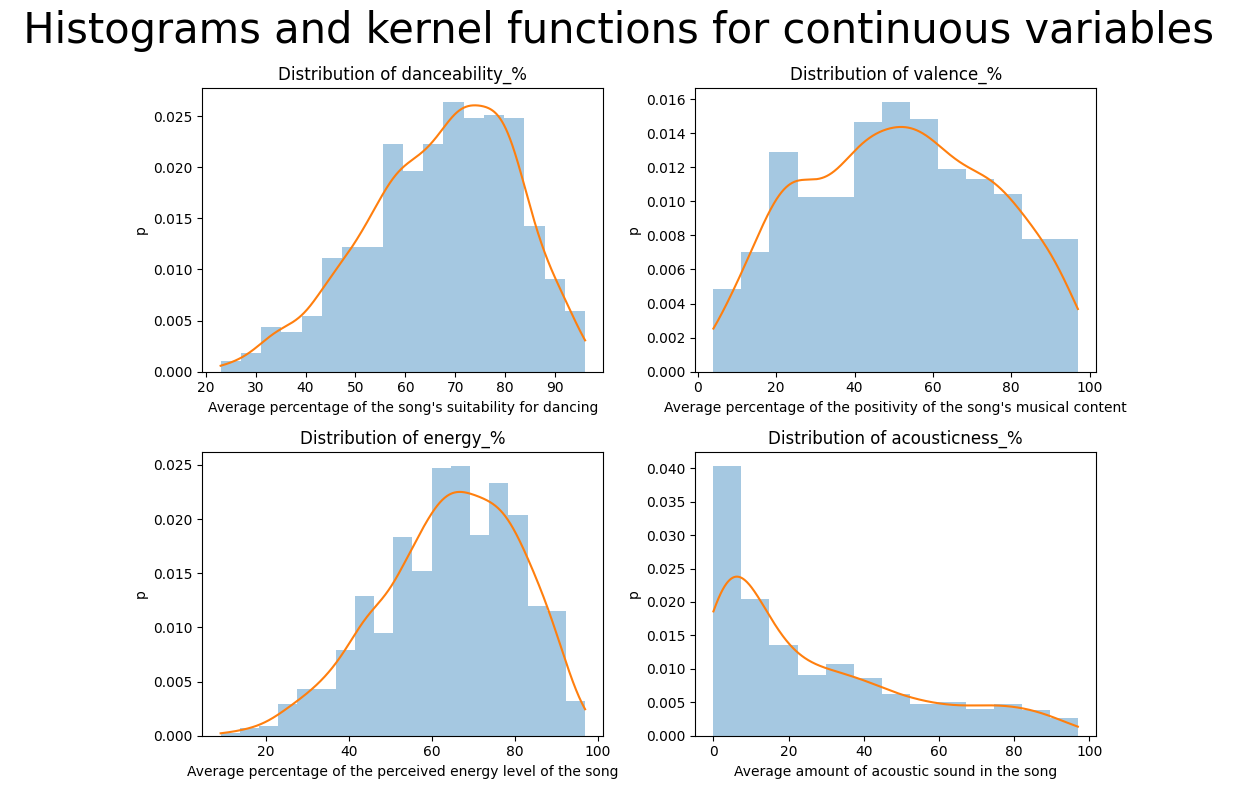

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats

# Создание общего графика (subplot)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle(' Histograms and kernel functions for continuous variables ', fontsize=30)

# График 1
kernel = scipy.stats.gaussian_kde(dataset_comp['danceability_%'])
min_amount, max_amount = dataset_comp['danceability_%'].min(), dataset_comp['danceability_%'].max()
x = np.linspace(min_amount, max_amount, len(dataset_comp))
kde_values = kernel(x)
sns.distplot(dataset_comp['danceability_%'], kde=False, norm_hist=True, label=f"Average percentage of the song's suitability for dancing", ax=axs[0, 0])
axs[0, 0].plot(x, kde_values)
axs[0, 0].set_ylabel('p')
axs[0, 0].set_xlabel("Average percentage of the song's suitability for dancing")
axs[0, 0].set_title("Distribution of danceability_%")

# График 2
kernel = scipy.stats.gaussian_kde(dataset_comp['valence_%'])
min_amount, max_amount = dataset_comp['valence_%'].min(), dataset_comp['valence_%'].max()
x = np.linspace(min_amount, max_amount, len(dataset_comp))
kde_values = kernel(x)
sns.distplot(dataset_comp['valence_%'], kde=False, norm_hist=True, label=f"Average percentage of the positivity of the song's musical content", ax=axs[0, 1])
axs[0, 1].plot(x, kde_values)
axs[0, 1].set_ylabel('p')
axs[0, 1].set_xlabel("Average percentage of the positivity of the song's musical content")
axs[0, 1].set_title("Distribution of valence_%")

# График 3
kernel = scipy.stats.gaussian_kde(dataset_comp['energy_%'])
min_amount, max_amount = dataset_comp['energy_%'].min(), dataset_comp['energy_%'].max()
x = np.linspace(min_amount, max_amount, len(dataset_comp))
kde_values = kernel(x)
sns.distplot(dataset_comp['energy_%'], kde=False, norm_hist=True, label=f"Average percentage of the perceived energy level of the song", ax=axs[1, 0])
axs[1, 0].plot(x, kde_values)
axs[1, 0].set_ylabel('p')
axs[1, 0].set_xlabel("Average percentage of the perceived energy level of the song")
axs[1, 0].set_title("Distribution of energy_%")

# График 4
kernel = scipy.stats.gaussian_kde(dataset_comp['acousticness_%'])
min_amount, max_amount = dataset_comp['acousticness_%'].min(), dataset_comp['acousticness_%'].max()
x = np.linspace(min_amount, max_amount, len(dataset_comp))
kde_values = kernel(x)
sns.distplot(dataset_comp['acousticness_%'], kde=False, norm_hist=True, label=f"Average amount of acoustic sound in the song", ax=axs[1, 1])
axs[1, 1].plot(x, kde_values)
axs[1, 1].set_ylabel('p')
axs[1, 1].set_xlabel("Average amount of acoustic sound in the song")
axs[1, 1].set_title("Distribution of acousticness_%")

# Установка общих параметров графика
plt.tight_layout()

# Отображение графика
plt.show()


Text(0.5, 1.0, 'Distribution of in_spotify_charts')

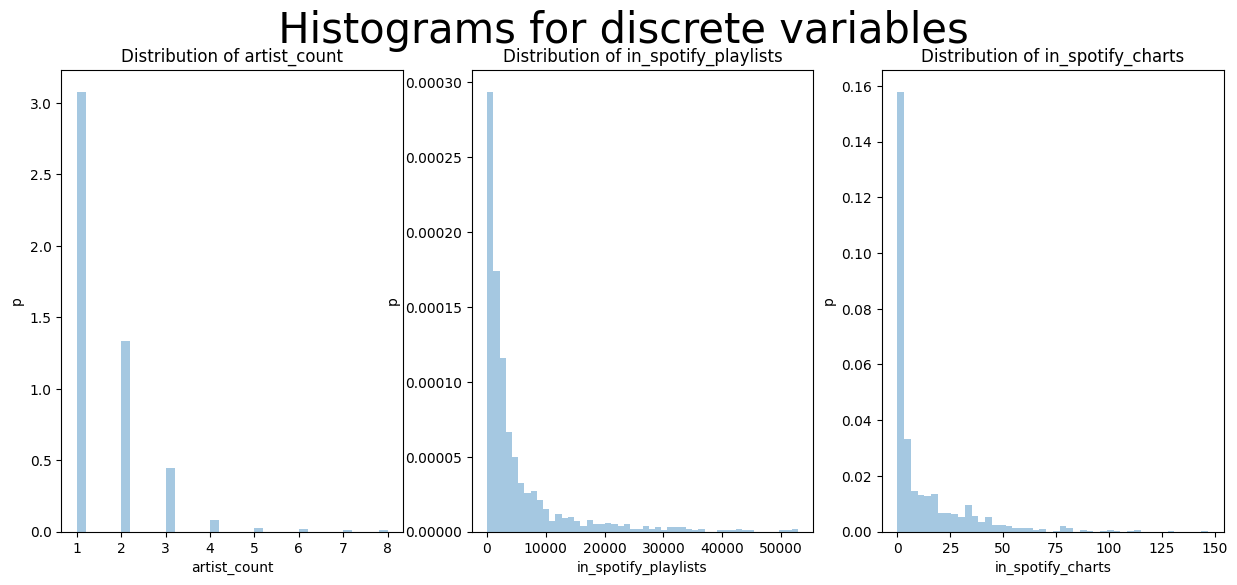

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle(' Histograms for discrete variables ', fontsize=30)

sns.distplot(dataset_comp['artist_count'], kde=False, norm_hist=True, label=f"artist_count", ax=axs[0])
axs[0].plot()
axs[0].set_ylabel('p')
axs[0].set_title("Distribution of artist_count")

sns.distplot(dataset_comp['in_spotify_playlists'], kde=False, norm_hist=True, label=f"in_spotify_playlists", ax=axs[1])
axs[1].plot()
axs[1].set_ylabel('p')
axs[1].set_title("Distribution of in_spotify_playlists")

sns.distplot(dataset_comp['in_spotify_charts'], kde=False, norm_hist=True, label=f"in_spotify_charts", ax=axs[2])
axs[2].plot()
axs[2].set_ylabel('p')
axs[2].set_title("Distribution of in_spotify_charts")



### 3. Oценка порядковых статистик представить их в виде “ящиков с усами”

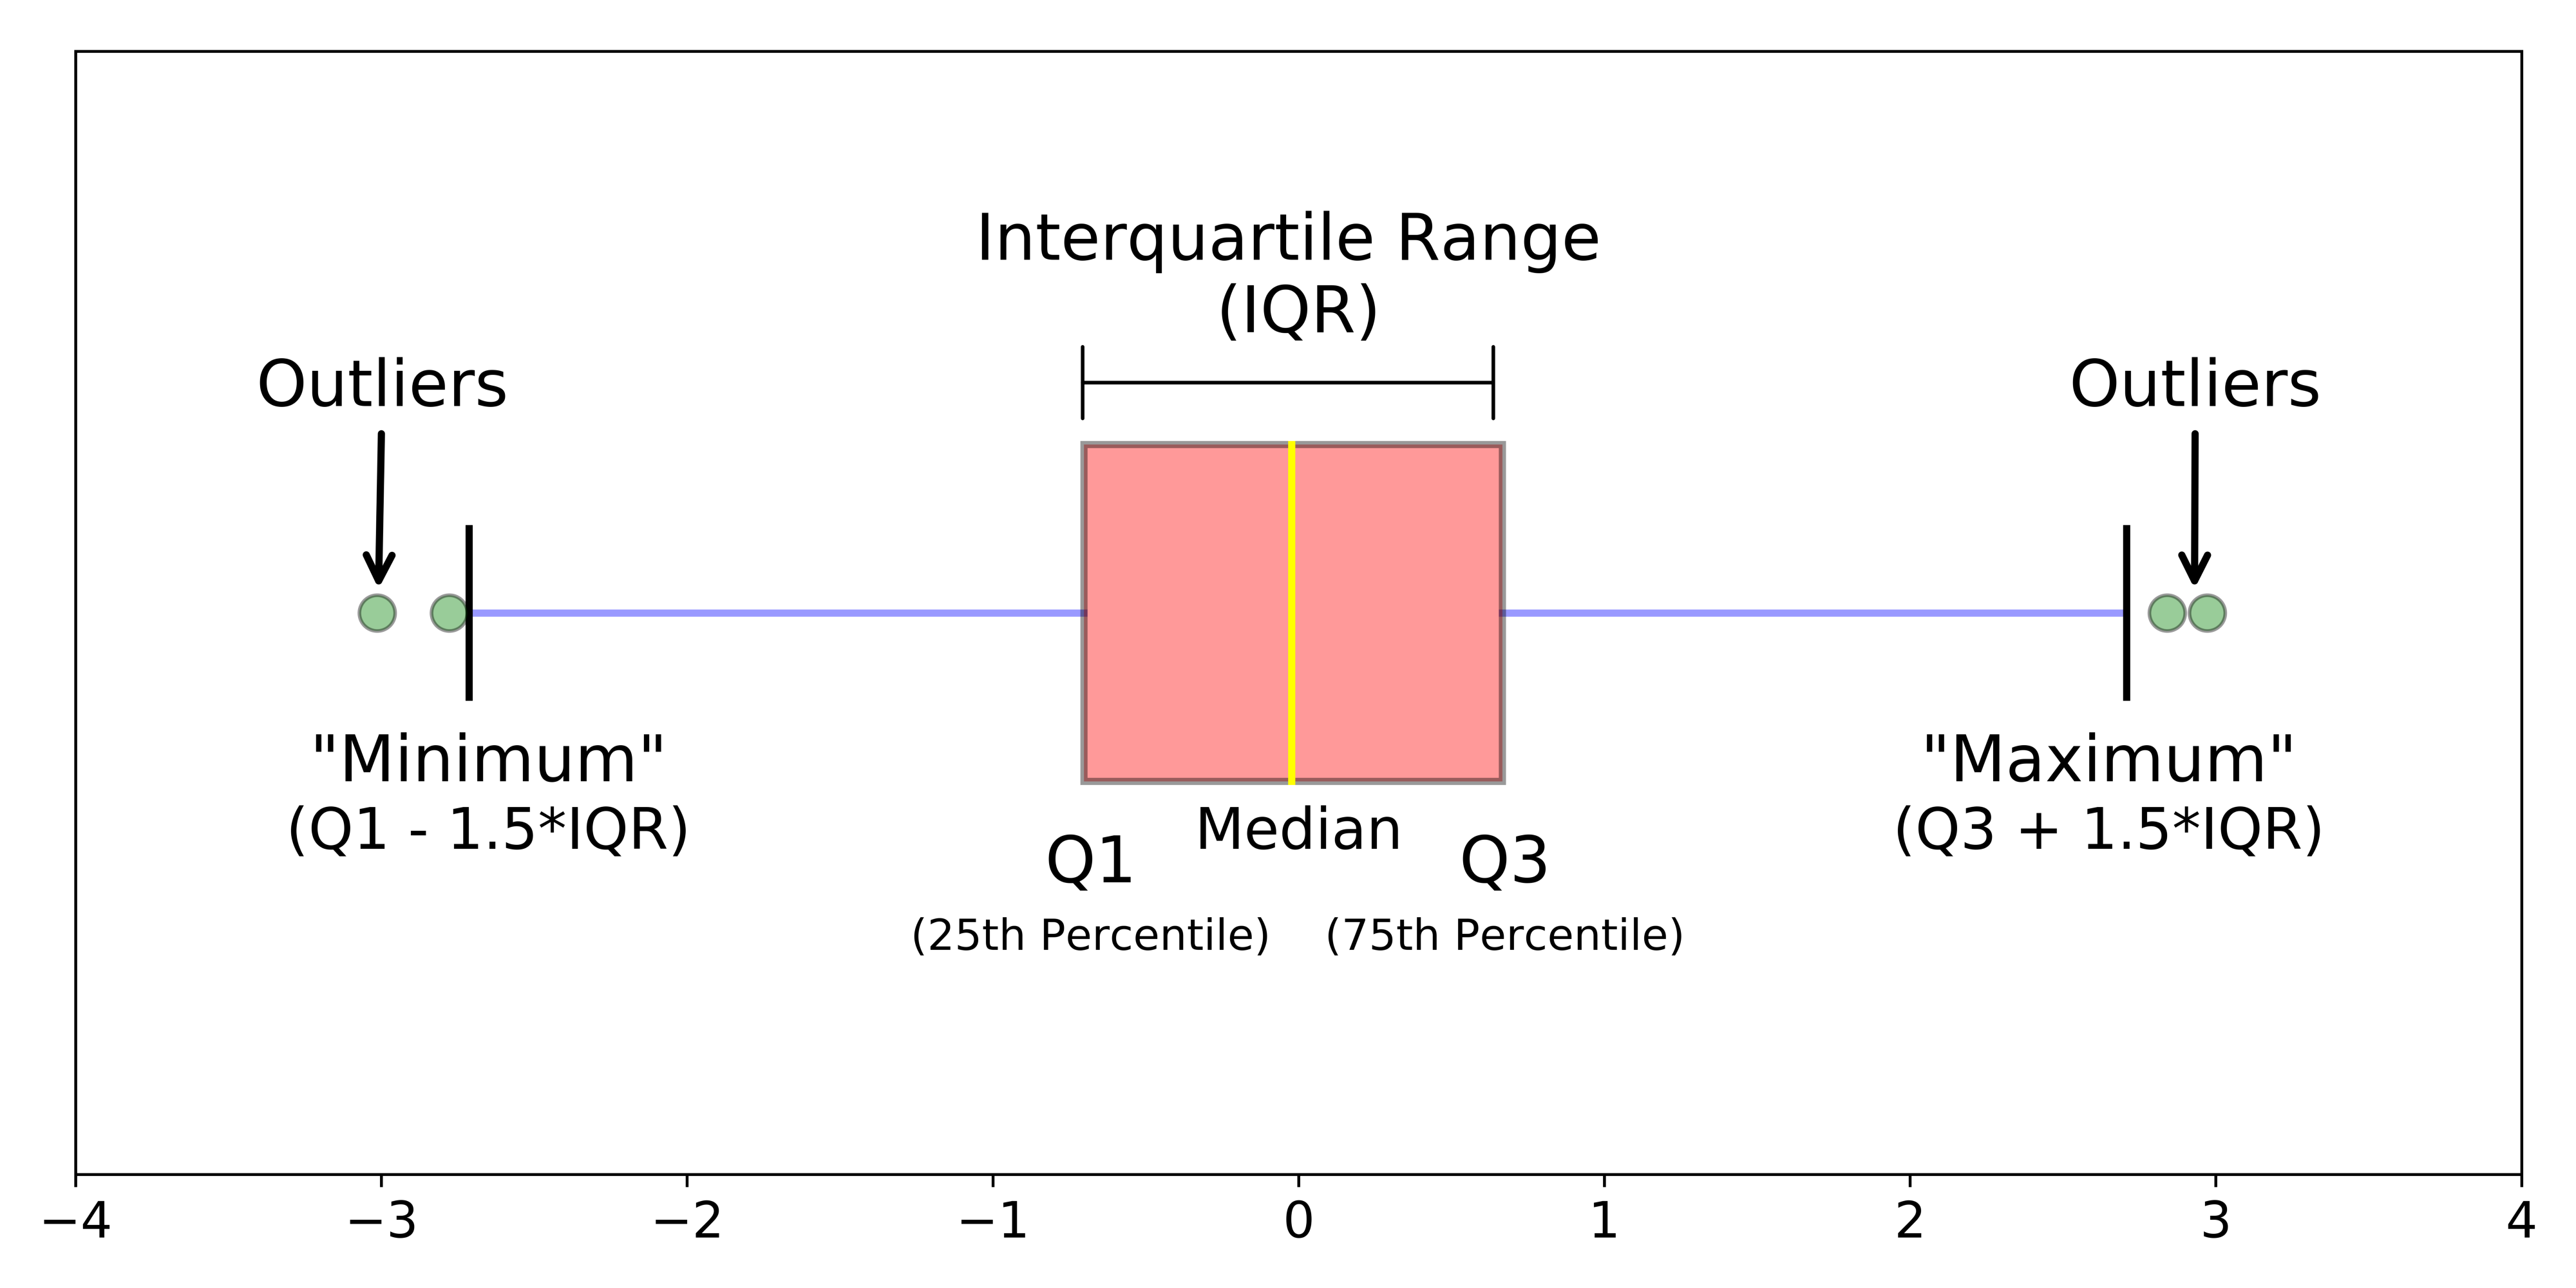

In [9]:
cols = [danceability, valence, energy, acousticness, artist_count, in_spotify_playlists, in_spotify_charts]
def mark_stat(data):
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    min_value = np.min(data)
    max_value = np.max(data)

    print(f"Медиана: {median}")
    print(f"Нижний квартиль (Q1): {q1}")
    print(f"Верхний квартиль (Q3): {q3}")
    print(f"Минимум: {min_value}")
    print(f"Максимум: {max_value}")

# for i in cols:
#     print(i.name)
#     mark_stat(i)
#     print('\n\n')

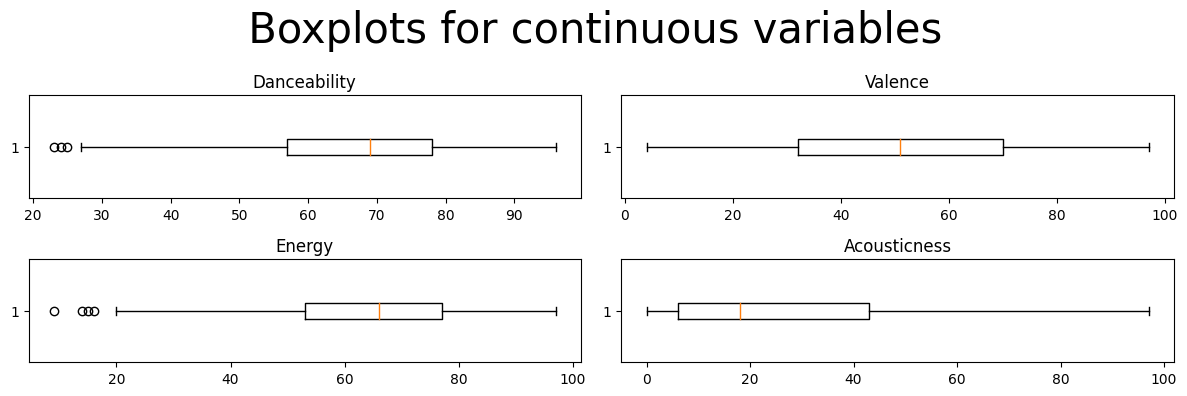

In [10]:

# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 4))
fig.suptitle(' Boxplots for continuous variables ', fontsize=30)

# Plot the boxplots on the subplots
axes[0, 0].boxplot(danceability, vert=False)
axes[0, 0].set_title('Danceability')

axes[0, 1].boxplot(valence, vert=False)
axes[0, 1].set_title('Valence')

axes[1, 0].boxplot(energy, vert=False)
axes[1, 0].set_title('Energy')

axes[1, 1].boxplot(acousticness, vert=False)
axes[1, 1].set_title('Acousticness')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


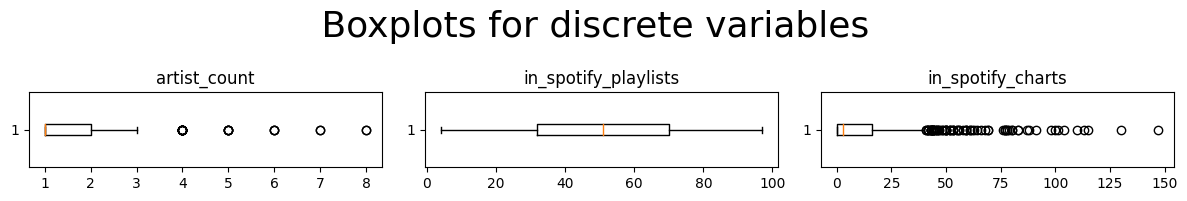

In [11]:
# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(12,2))
fig.suptitle(' Boxplots for discrete variables ', fontsize=26)

# Plot the boxplots on the subplots
axes[0].boxplot(artist_count, vert=False)
axes[0].set_title('artist_count')

axes[1].boxplot(valence, vert=False)
axes[1].set_title('in_spotify_playlists')

axes[2].boxplot(in_spotify_charts, vert=False)
axes[2].set_title('in_spotify_charts')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [12]:
# #outliers
# #find Q1, Q3, and interquartile range for each column
# Q1 = danceability.quantile(q=.25)
# Q3 = danceability.quantile(q=.75)
# IQR = danceability.apply(stats.iqr)

# #only keep rows in dataframe that have values within 1.5\*IQR of Q1 and Q3
# #data_clean = danceability[~((danceability < (Q1-1.5\*IQR)) | (danceability > (Q3+1.5\*IQR))).any(axis=1)]

# #find how many rows are left in the dataframe
# data_clean.shape

### 4. Нахождение одного или нескольких теоретических распределений
, которые могли бы описать выборку. Можно использовать смеси

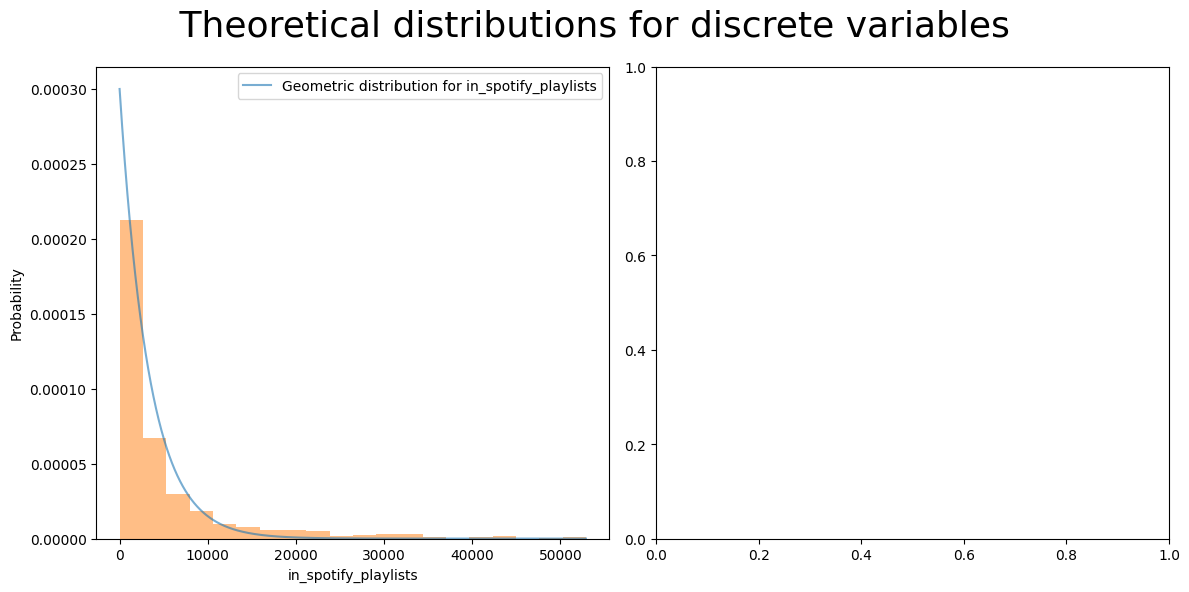

In [13]:


# Calculate the parameters for the distributions
p_rough = 0.0003
p = p_rough#1/np.mean(in_spotify_playlists)
mu = in_spotify_charts.mean()

# Create the x and y values for the distributions
x_geo = np.arange(1, max(in_spotify_playlists)+1)
y_geo = geom.pmf(x_geo, p)
y_exp = expon.pdf(x_geo,scale=5000)

x_poisson = np.arange(0, max(in_spotify_charts) + 1)
y_poisson = poisson.pmf(x_poisson, mu)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle(' Theoretical distributions for discrete variables ', fontsize=26)

# Plot the first distribution and histogram on the left subplot
axs[0].plot(x_geo, y_geo, label=f'Geometric distribution for {in_spotify_playlists.name}', alpha=0.6)
# axs[0].plot(x_geo, y_exp, label=f'Exp distribution for {in_spotify_playlists.name}', alpha=0.6)
axs[0].hist(in_spotify_playlists, bins=20, density=True, alpha=0.5)
axs[0].set_xlabel('in_spotify_playlists')
axs[0].set_ylabel('Probability')
axs[0].legend()

# Plot the second distribution and histogram on the right subplot
# axs[1].plot(x_poisson, y_poisson, label=f'Poisson distribution for {in_spotify_charts.name}', alpha=0.6)
# axs[1].hist(in_spotify_charts, bins=20, density=True, alpha=0.5)
# axs[1].set_xlabel('in_spotify_charts')
# axs[1].set_ylabel('Probability')
# axs[1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()



### 5. Оценка параметров выбранных распределений
- используя методы максимального правдоподобия и
- метод наименьших квадратов.

#### Discrete

In [14]:
res = sts.fit(geom, in_spotify_playlists.values)
p_likelihood = res.params[0]
geom_likelihood_fitted = geom(p_likelihood).pmf(x_geo)
def geom_pmf(x,p):
    return geom(p=p).pmf(x)

d =  in_spotify_playlists.values
xs = sorted(list(set(d)))
hist, bin_edges = np.histogram(d,bins=xs, density=True)
y_hist = hist   # эмпирическая функция плотности
p_ols = curve_fit(geom_pmf,xs[:-1],hist, p0=p_rough)[0][0]
geom_ols_fitted = geom(p=p_ols).pmf(x_geo)

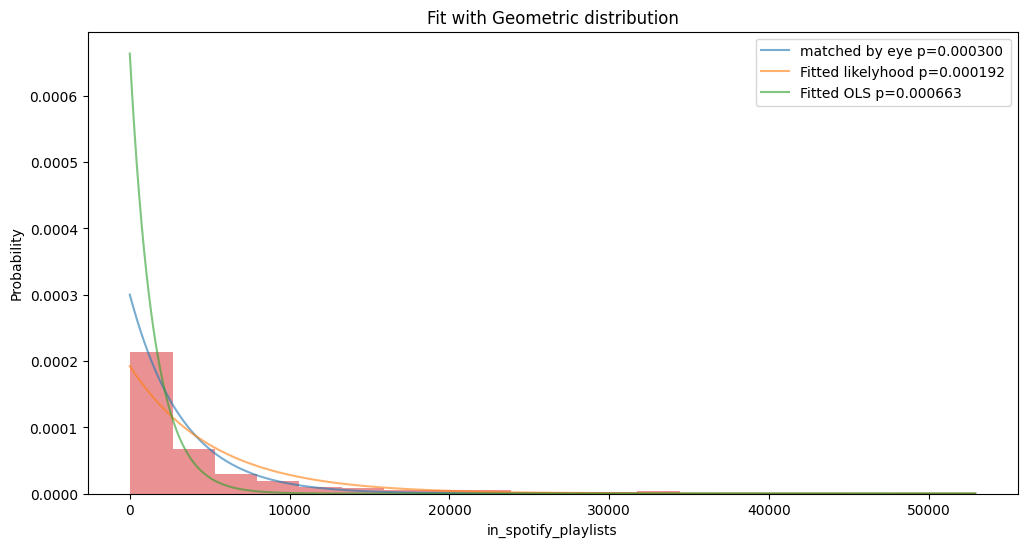

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))#1, 2, figsize=(12, 6))
ax.plot(x_geo, y_geo, label=f'matched by eye p='+"{:.6f}".format(p_rough), alpha=0.6)
ax.plot(x_geo, geom_likelihood_fitted, label=f'Fitted likelyhood p='+"{:.6f}".format(p_likelihood), alpha=0.6)
ax.plot(x_geo, geom_ols_fitted, label=f'Fitted OLS p='+"{:.6f}".format(p_ols), alpha=0.6)
ax.hist(in_spotify_playlists, bins=20, density=True, alpha=0.5)
ax.set_xlabel('in_spotify_playlists')
ax.set_ylabel('Probability')
plt.title("Fit with Geometric distribution")
ax.legend()

Text(0.5, 0.98, 'in_spotify_playlists Fit with Geometric distribution p_ols=0.00066')

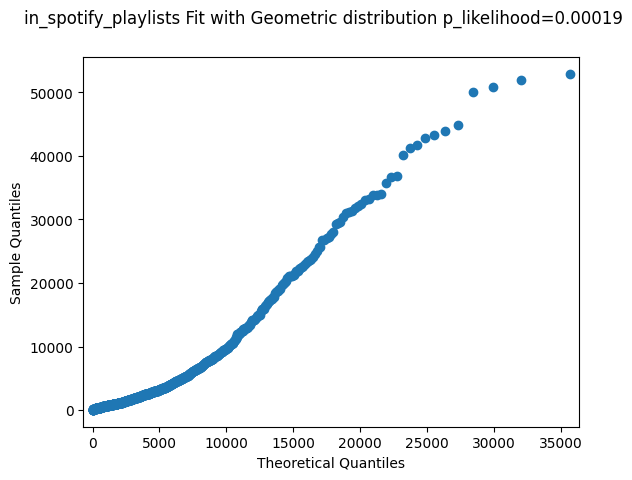

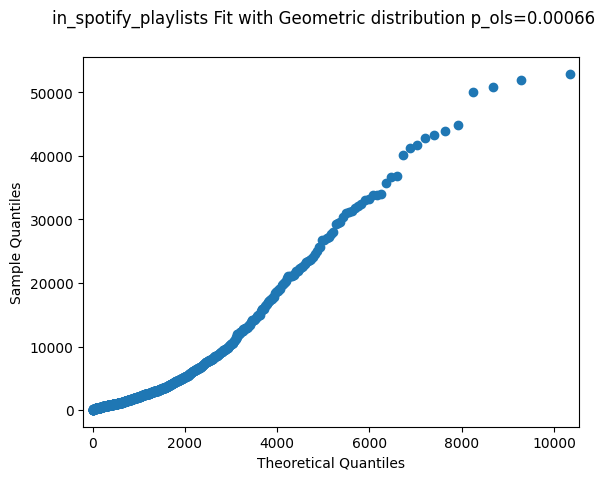

In [16]:
fig = sm.qqplot(in_spotify_playlists, geom(p=p_likelihood))
fig.suptitle(f"in_spotify_playlists Fit with Geometric distribution p_likelihood={p_likelihood.round(5)}")
fig = sm.qqplot(in_spotify_playlists, geom(p=p_ols))
fig.suptitle(f"in_spotify_playlists Fit with Geometric distribution p_ols={p_ols.round(5)}")

#### Continuous

##### Energy

In [22]:
xs_en = sorted(list(set(energy)))
energy_scaled = energy.values
energy_scaled =energy_scaled/ max(energy_scaled)
x_en = np.linspace(0, max(energy_scaled))

beta_likelihood_params = sts.beta.fit(energy_scaled)
a_lh,b_lh = beta_likelihood_params[:2]
beta_likelihood_fitted = beta(a_lh,b_lh).pdf(x_en)
def beta_pdf(x,a,b):
    return beta(a,b).pdf(x)

xs = sorted(list(set(energy_scaled)))
hist, bin_edges = np.histogram(energy_scaled,bins=xs, density=True)
a_ols, b_ols = curve_fit(beta_pdf,xs[:-1],hist)[0]
beta_ols_fitted = beta(a_ols,b_ols).pdf(x_en)

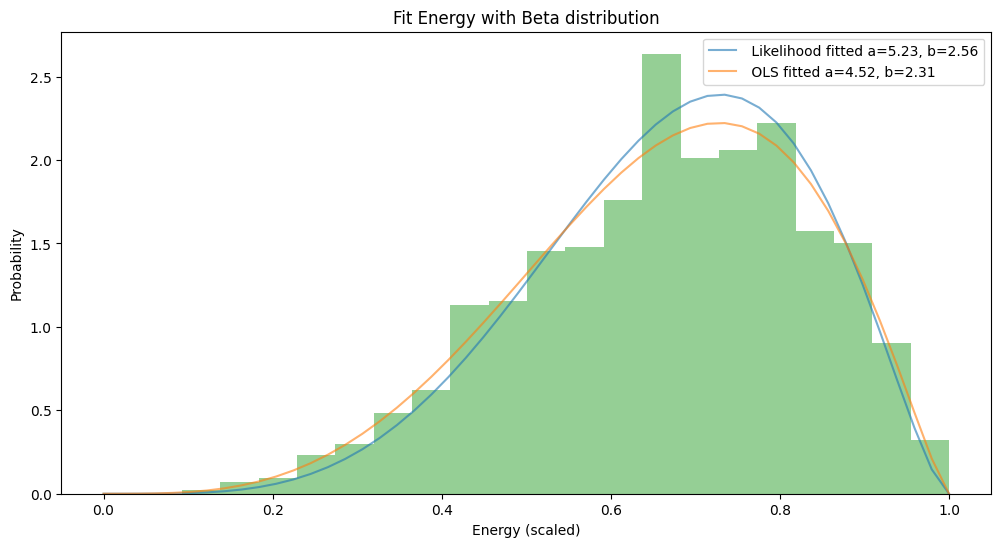

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_en, beta_likelihood_fitted, label=f" Likelihood fitted a={a_lh.round(2)}, b={b_lh.round(2)}", alpha=0.6)
ax.plot(x_en, beta_ols_fitted, label=f" OLS fitted a={a_ols.round(2)}, b={b_ols.round(2)}", alpha=0.6)
ax.hist(energy_scaled, bins=20, density=True, alpha=0.5)
ax.set_xlabel('Energy (scaled)')
ax.set_ylabel('Probability')
plt.title("Fit Energy with Beta distribution")
ax.legend()

Text(0.5, 0.98, 'Energy Beta distribution OLS fitted a=4.52, b=2.31')

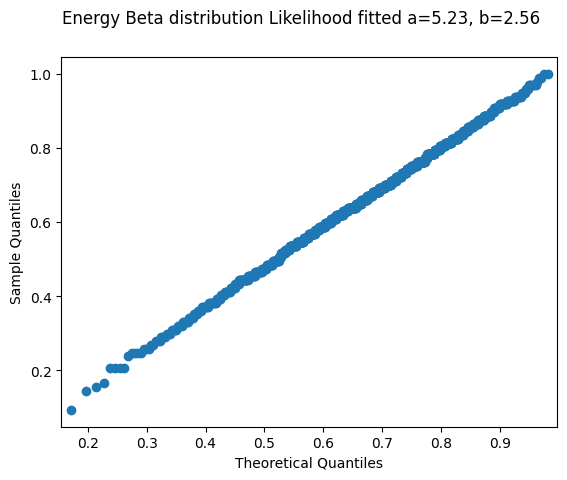

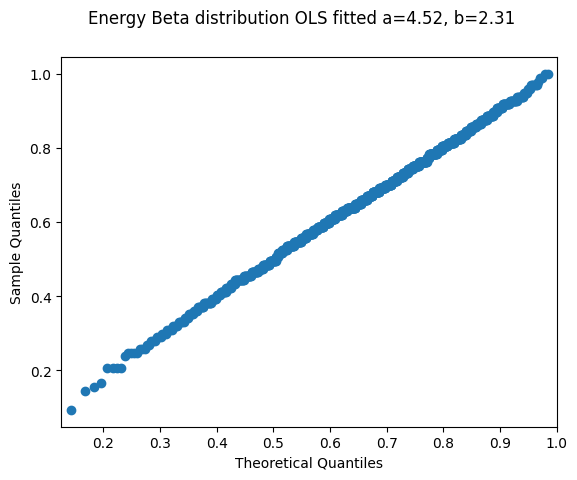

In [24]:
fig = sm.qqplot(energy_scaled, beta(a=a_lh, b=b_lh))
fig.suptitle(f"Energy Beta distribution Likelihood fitted a={a_lh.round(2)}, b={b_lh.round(2)}")
fig = sm.qqplot(energy_scaled, beta(a=a_ols, b=b_ols))
fig.suptitle(f"Energy Beta distribution OLS fitted a={a_ols.round(2)}, b={b_ols.round(2)}")

##### Acousticness

In [20]:
# x_ac = np.arange(1, max(acousticness)+1)
# res = sts.fit(expon, acousticness.values)
# p_likelihood = res.params[0]
# expon_likelihood_fitted = expon(p_likelihood).pdf(x_ac)
# def geom_pmf(x,p):
#     return geom(p=p).pmf(x)

# d =  in_spotify_playlists.values
# xs = sorted(list(set(d)))
# hist, bin_edges = np.histogram(d,bins=xs, density=True)
# y_hist = hist   # эмпирическая функция плотности
# p_ols = curve_fit(geom_pmf,xs[:-1],hist, p0=p_rough)[0][0]
# geom_ols_fitted = geom(p=p_ols).pmf(x_geo)

NameError: name 'x_ac' is not defined

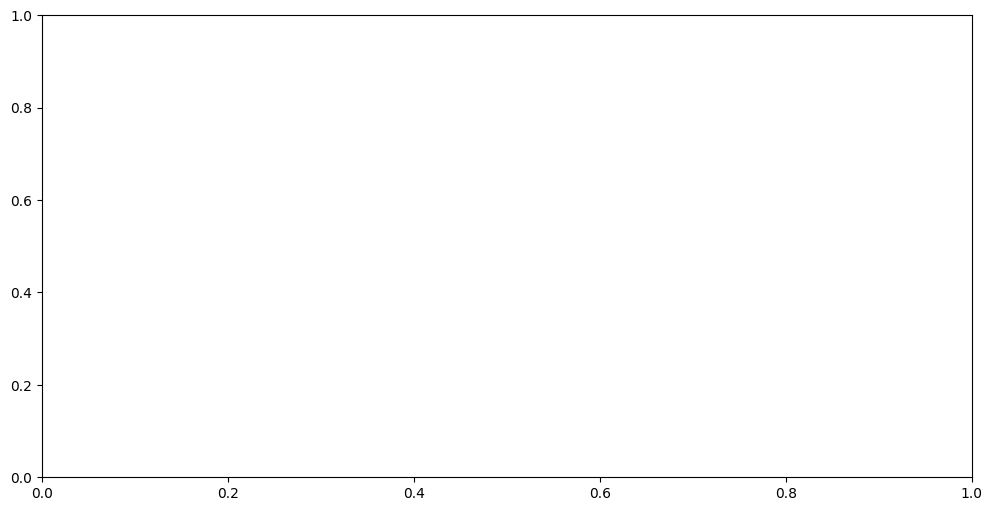

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
# ax.plot(x_geo, y_geo, label=f'matched by eye p='+"{:.6f}".format(p_rough), alpha=0.6)
ax.plot(x_ac, expon_likelihood_fitted, label=f'Fitted likelihood p='+"{:.6f}".format(p_likelihood), alpha=0.6)
# ax.plot(x_geo, geom_ols_fitted, label=f'Fitted OLS p='+"{:.6f}".format(p_ols), alpha=0.6)
ax.hist(acousticness, bins=20, density=True, alpha=0.5)
ax.set_xlabel('in_spotify_playlists')
ax.set_ylabel('Probability')
plt.title("Fit with Geometric distribution")
ax.legend()

### 6. Проверка оцененных параметров
- с помощью графика квантиль-квантиль (QQ)

Text(0.5, 0.98, 'p_ols=0.00066')

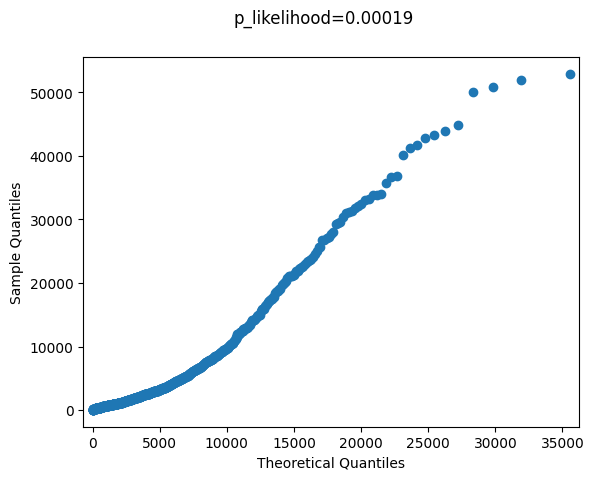

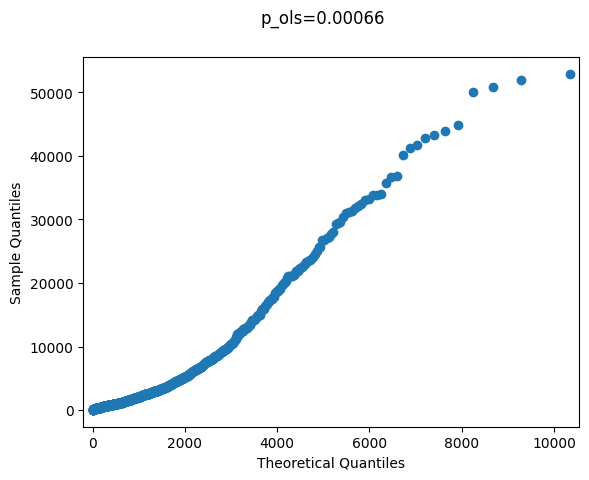

In [ ]:
# q1 = np.percentile(data, 25)
# q3 = np.percentile(data, 75)



### 7. Оценка достоверности подогнанных распределений
- используя не менее 2 статистических тестов.

In [ ]:
# Calculation of the Kolmogorov-Smirnov test and chi-square
#ks = scipy.stats.kstest(danceability, 'lognorm', params, N=100)
#print(ks)

### 8. Cемплирование СВ
- Используя одномерные параметрические распределения, которые были подобраны, выполните
- Используйте для этого не менее 2 различных методов семплирования